In [2238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [2239]:
# load dataset
customer_df = pd.read_csv("/content/Mall_Customers.csv")

In [2240]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2241]:
customer_df.shape

(200, 5)

In [2242]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2243]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [2244]:
customer_dtype = customer_df.dtypes
customer_dtype.value_counts()

,count
int64,4
object,1


In [2245]:

customer_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


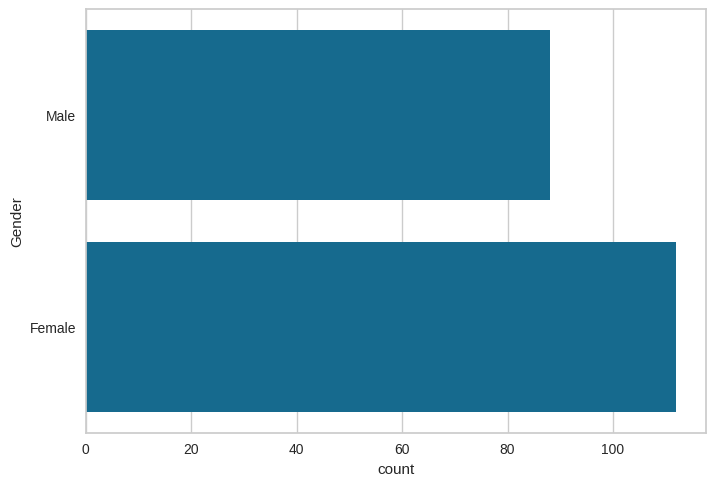

In [2246]:

sns.countplot(customer_df['Gender'])

plt.show()

<ipython-input-2247-f049f4c31f0a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

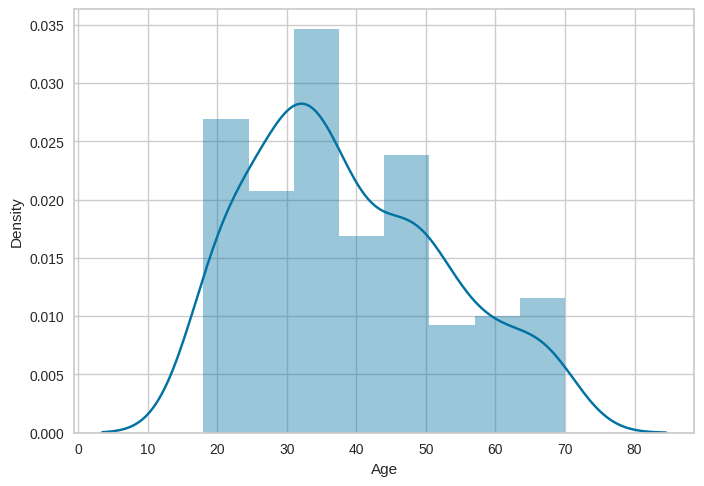

In [2247]:
sns.distplot(customer_df['Age'])

<ipython-input-2248-8741df392f00>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

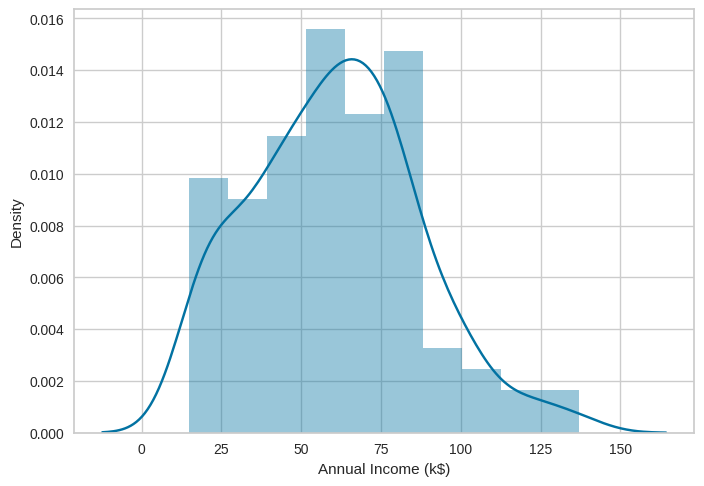

In [2248]:
sns.distplot(customer_df['Annual Income (k$)'])

<ipython-input-2249-51aba56e200d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

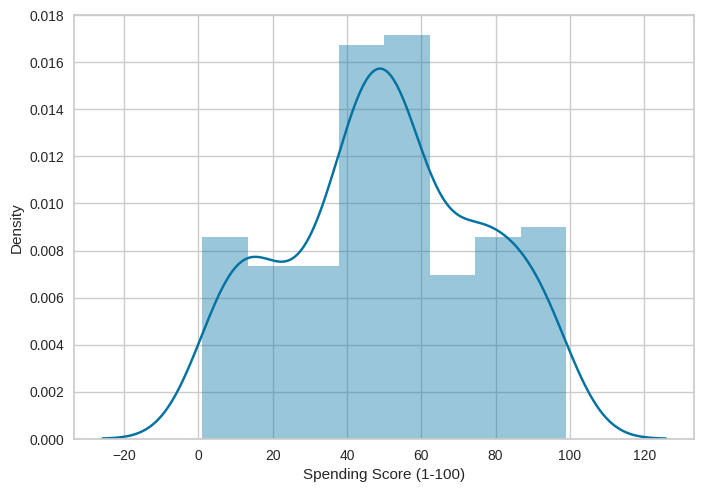

In [2249]:
sns.distplot(customer_df['Spending Score (1-100)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

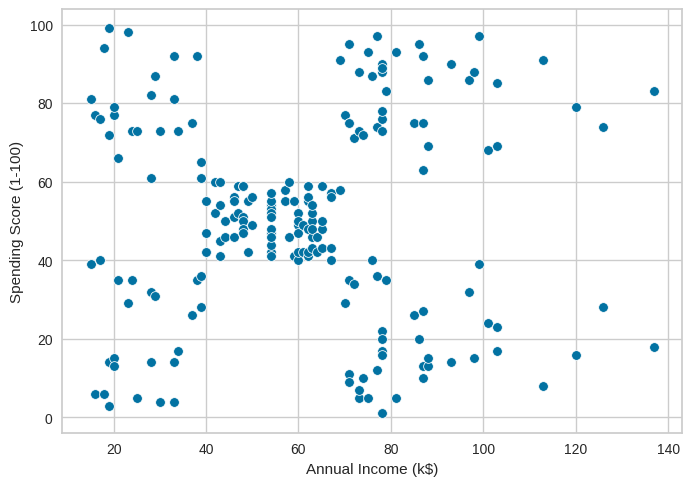

In [2250]:
# scatter plot
sns.scatterplot(x=customer_df['Annual Income (k$)'],
                y=customer_df['Spending Score (1-100)'])


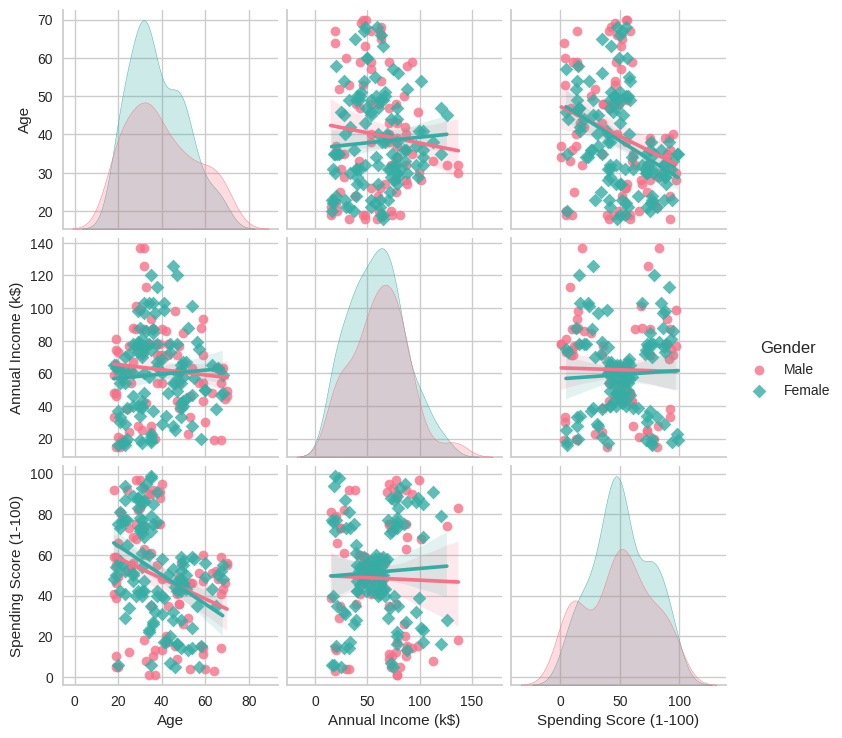

In [2251]:
#Pairplot
sns.pairplot(customer_df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])


In [2252]:
customer_df.drop(columns='CustomerID',axis=1,inplace=True)


In [2253]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of the LabelEncoder class
le = LabelEncoder()
# Get a list of categorical columns
categorical_cols = customer_df.select_dtypes(include='object').columns
# Apply the label encoder to each categorical column
for col in categorical_cols:
    customer_df[col] = le.fit_transform(customer_df[col])

In [2254]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


<Axes: >

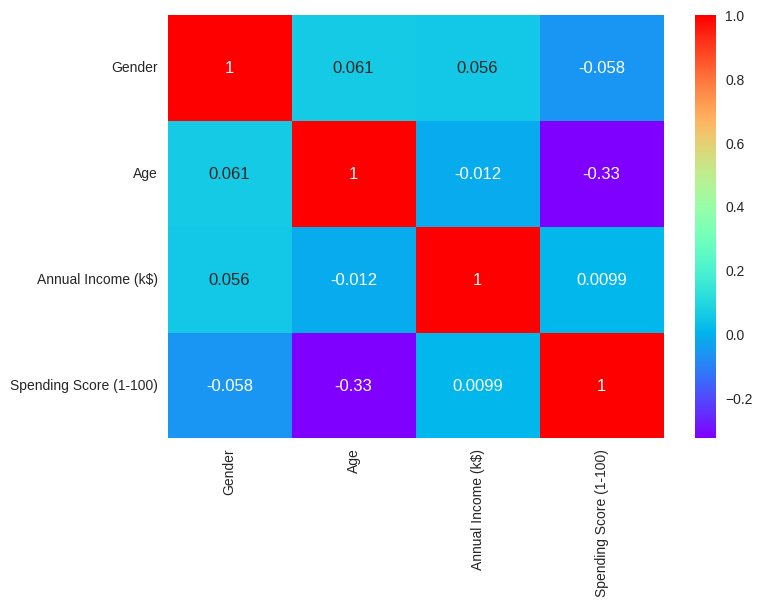

In [2255]:
corr = customer_df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [2256]:
# select the features
X = customer_df
#Scaling Data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [2257]:
X

array([[ 1.        , -0.83950617, -1.2739726 , -0.2875817 ],
       [ 1.        , -0.74074074, -1.2739726 ,  0.81045752],
       [ 0.        , -0.79012346, -1.24657534, -1.1503268 ],
       [ 0.        , -0.64197531, -1.24657534,  0.70588235],
       [ 0.        , -0.24691358, -1.21917808, -0.26143791],
       [ 0.        , -0.69135802, -1.21917808,  0.67973856],
       [ 0.        , -0.04938272, -1.19178082, -1.1503268 ],
       [ 0.        , -0.64197531, -1.19178082,  1.1503268 ],
       [ 1.        ,  1.38271605, -1.16438356, -1.22875817],
       [ 0.        , -0.2962963 , -1.16438356,  0.5751634 ],
       [ 1.        ,  1.5308642 , -1.16438356, -0.94117647],
       [ 0.        , -0.04938272, -1.16438356,  1.28104575],
       [ 0.        ,  1.08641975, -1.1369863 , -0.91503268],
       [ 0.        , -0.59259259, -1.1369863 ,  0.70588235],
       [ 1.        ,  0.04938272, -1.1369863 , -0.96732026],
       [ 1.        , -0.69135802, -1.1369863 ,  0.75816993],
       [ 0.        , -0.

In [2258]:
from sklearn.cluster import KMeans

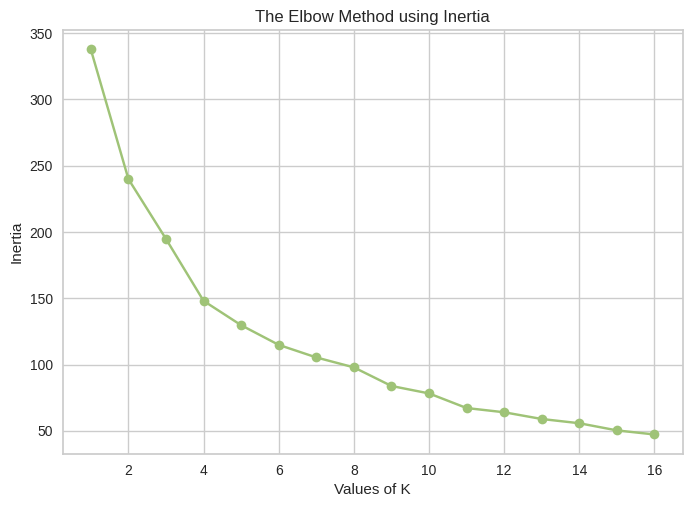

In [2259]:
inertia = []
range_val = range(1,17)
for i in range_val:
  kmean = KMeans(n_clusters=i,init='k-means++',random_state=3)
  kmean.fit_predict(pd.DataFrame(X))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'go-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [2271]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7]

for num_clusters in range_n_clusters:

        # intialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=126)
        kmeans.fit(X)

        cluster_labels = kmeans.labels_

        # silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2736710323556702
For n_clusters=3, the silhouette score is 0.23834463877198644
For n_clusters=4, the silhouette score is 0.27092092377220817
For n_clusters=5, the silhouette score is 0.31868423241198435
For n_clusters=6, the silhouette score is 0.3161831507216319
For n_clusters=7, the silhouette score is 0.311526978007964


In [2272]:
# apply kmeans algorithm
kmeans_model=KMeans(5)
kmeans_clusters = kmeans_model.fit_predict(X)

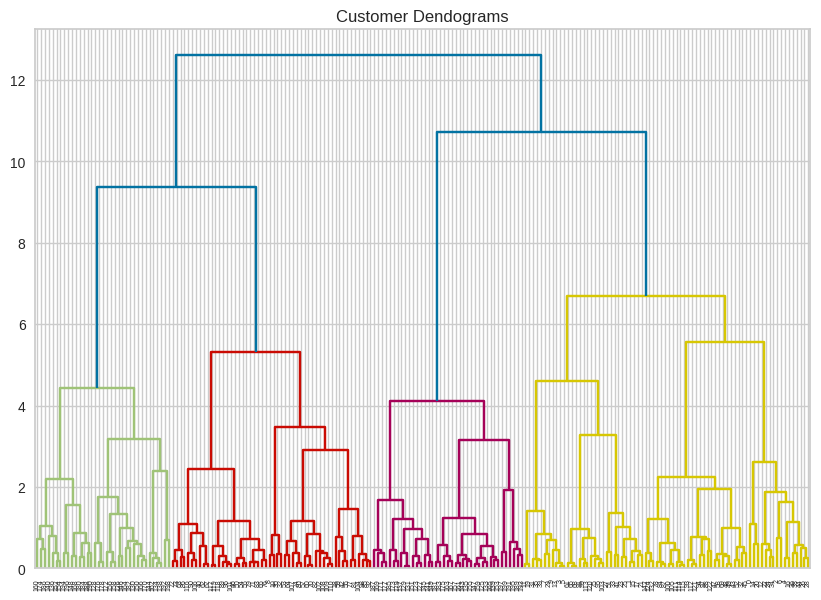

In [2273]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = sch.dendrogram(sch.linkage(X, method='ward'))



In [2274]:
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(X)

In [2275]:
agglomerative_clusters

array([0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0, 4, 0, 0, 0, 4, 1, 4, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 4, 0, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 0, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 4, 1, 0, 0, 4, 1, 0, 1, 4, 0, 1, 1, 4, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 4, 0, 0, 1, 1, 1, 1, 4, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [2276]:
def silhouette_method(df,algo,y_pred):
    print('=================================================================================')
    print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(X,' : KMeans',kmeans_clusters)
silhouette_method(X,' : Agglomerative',agglomerative_clusters)


print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.3191803261838392
Clustering   : Agglomerative  : silhouette score :  0.2969247558305054


In [2277]:
# add the cluster predictions to the dataframe
customer_df['cluster'] = kmeans_clusters
# display the first 5 rows of the dataframe with the cluster predictions
print(customer_df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0       1   19                  15                      39        3
1       1   21                  15                      81        3
2       0   20                  16                       6        1
3       0   23                  16                      77        3
4       0   31                  17                      40        3


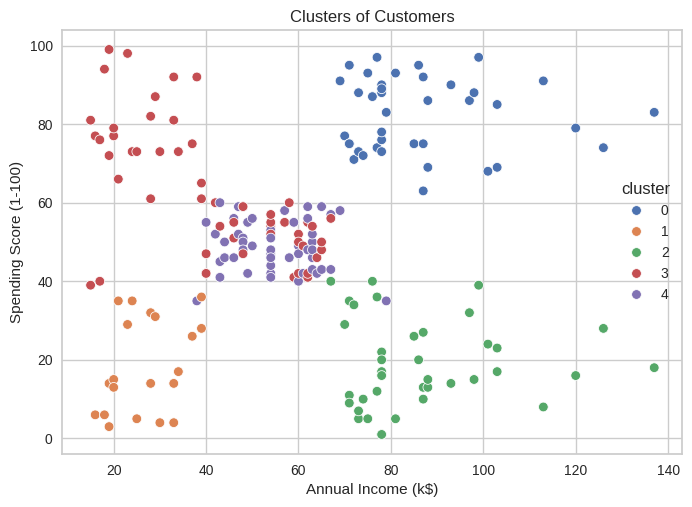

In [2278]:
# Scatter plot on Original attributes to visualize the spread of the data
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=customer_df, palette="deep")
# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
# show the plot
plt.show()

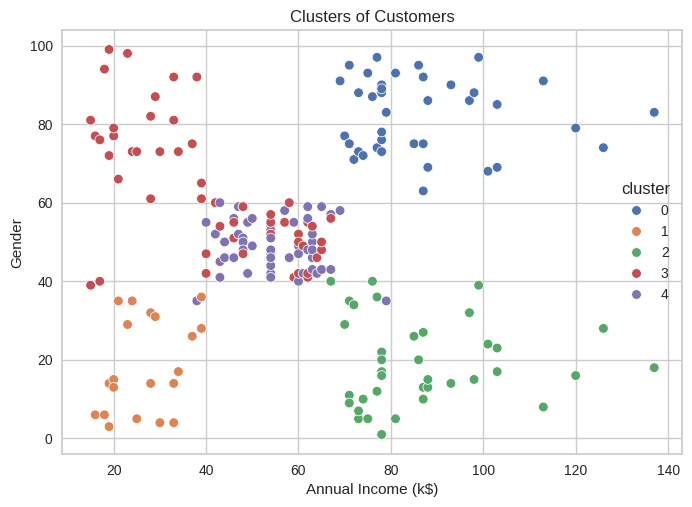

In [2279]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=customer_df, palette="deep")
# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')
# show the plot
plt.show()

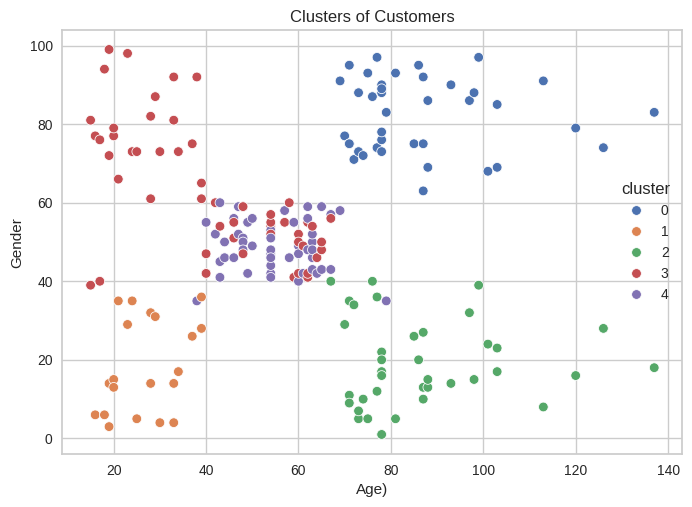

In [2280]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=customer_df, palette="deep")
# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Gender')
# show the plot
plt.show()

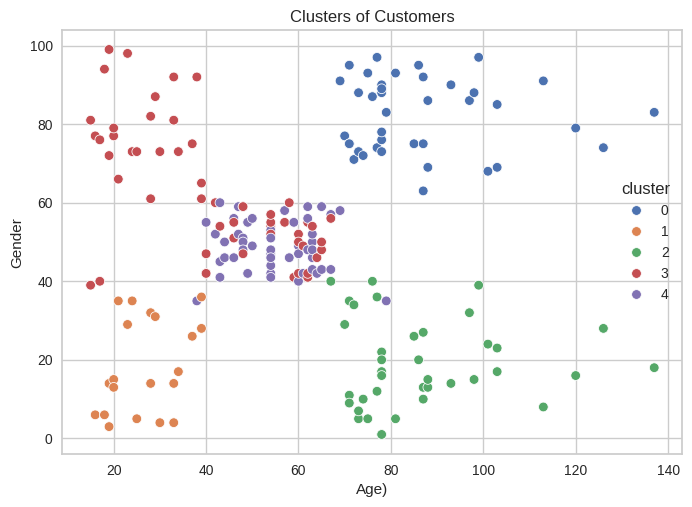

In [2281]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=customer_df, palette="deep")
# add a title and labels to the plot
plt.title('Clusters of Customers')
plt.xlabel('Age)')
plt.ylabel('Gender')
# show the plot
plt.show()